In [2]:
import numpy as np
import pandas as pd
import matplotlib
print(matplotlib.__version__)
matplotlib.use('PDF')
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import matplotlib.lines as mlines
from glob import glob
from collections import Counter
import ns
import history_cmc as hic
import math
import scipy
from scipy import stats
import matplotlib.cm as cm
import matplotlib as mpl
import random
from random import shuffle
#import seaborn as sns

import gw_ecc_calc as gwcalc
import unit_convert as uc
import merger_rate_calculator as mr
import ns_tidalcapture as tc
import psr_catalog as pc


%matplotlib inline
%config InlineBackend.figure_format = 'retina'

matplotlib.rcParams.update({'font.size': 22})
rc = {"font.family" : "serif", 
      "mathtext.fontset" : "stix"}
plt.rcParams.update(rc)
plt.rcParams["font.serif"] = ["Times New Roman"] + plt.rcParams["font.serif"]

      
twopi=2.*np.pi
yearsc=3.1557*10**7
Kconst=9.87*10**-48 ##yr/G^2
Gconst=6.674*10**-8 ##cm3*g-1*s-2
clight=3*10**10 ##cm/s
Msun=2*10**33 ##gram
AU=1.496*10**13  ##cm
PC=3.086*10**18  ##cm

savepath='/projects/b1095/syr904/projects/PULSAR2/tc_comparison/'

2.1.2


280


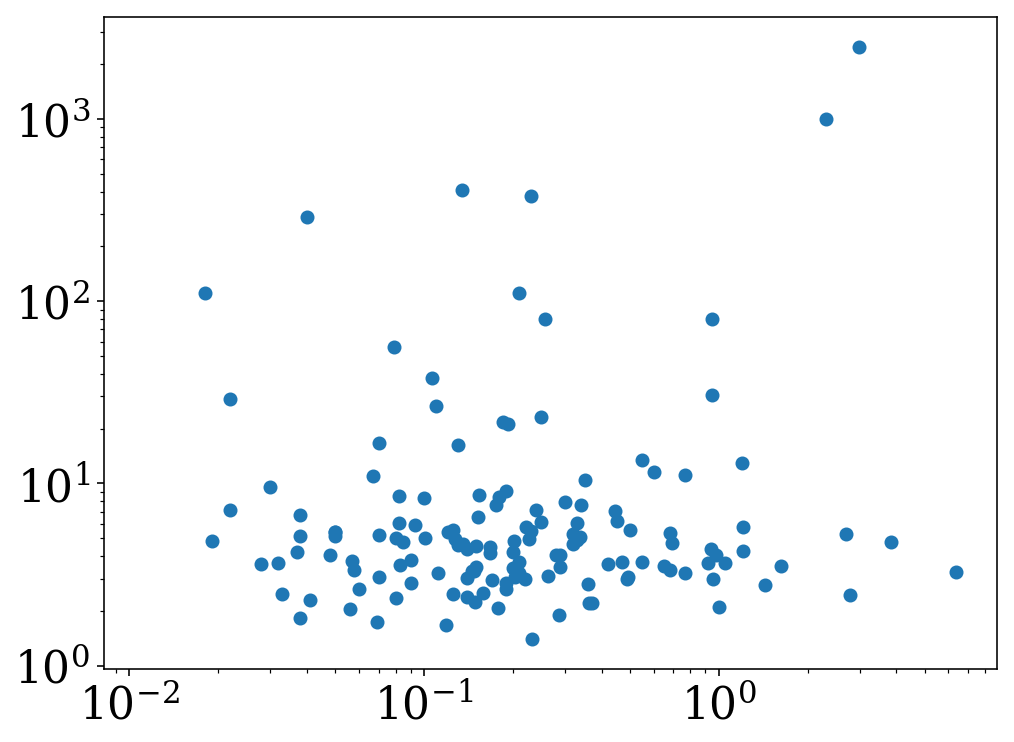

In [2]:
Poff, Offset, Binoff, Nameoff, Clusoff = pc.readdata_freire(spinflag=0,offsetflag=1)

plt.rcParams['figure.figsize'] = [8,24]

fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(Offset,Poff)

ax.set_yscale('log')
ax.set_xscale('log')

254
254 254
['0.00031', '0.07056', '<0.0004', '<0.00004', '<0.00016', '0.0', '0.00008', '0.0', '0.00039', '0.00040', '0.00014', '0.0', '0.0', '0.0000005', '0.000003', '0', '0', '0.88798', '0.862', '0.708', '0', '0', '0.020', '0.0098', '0', '<0.01', '0.0', '0.0', '0.0753', '0.0', '0', '0.13784', '0.0', '0.0', '0.0', '0.0', '0.0', '0.02532', '0.000002', '0.0005730', '0.00012', '0.0', '0.000004', '<0.00007', '<0.00006', '0.00045', '0.0', '0.0', '0.000907', '0', '<0.005', '0', '0', '0', '<0.0001', '0.0', '0.02', '0.428', '0.350', '0', '0.000045', '0', '0', '0.722', '0.60498', '0', '0.015', '0.3024', '0.00002', '0.7608', '0', '0', '0.4400', '0.20475', '0.0065856', '0.57016', '0.00', '0.0531', '0', '0.71243', '0.00404', '0.038', '0.21206', '0.0', '0.74703', '0', '0.380466', '0.84704372', '0.776334', '0.0', '0.0', '0.0', '0.0', '0.001524', '0.0', '0.0', '0.0', '0.000021', '0.0', '0', '0.0', '<0.00001', '<0.00013', '0.0', '0.68139', '0.0751', '0', '0', '0', '<0.00012', '>0.52']
['0.18', '0.19'

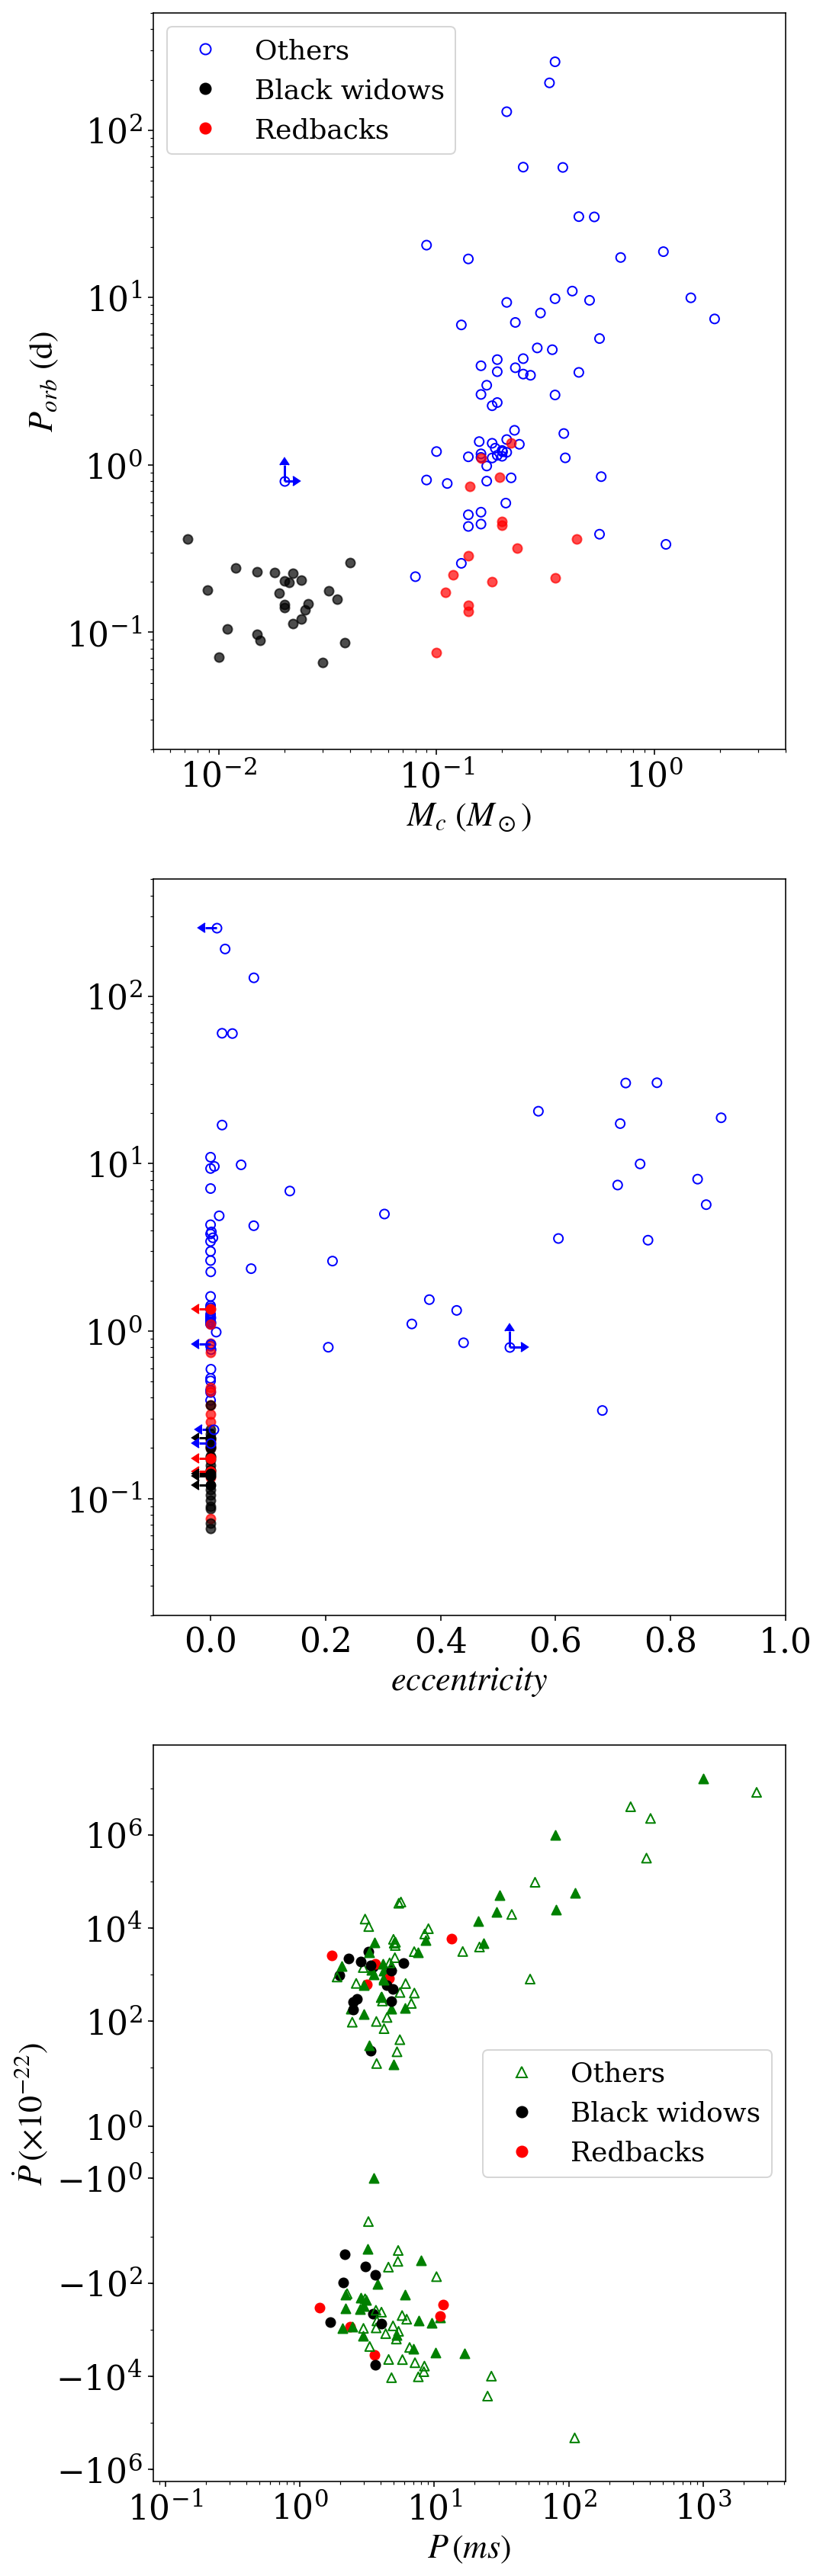

In [3]:
P, Pdot, Binflag, Namespin, Period, Ecc, Mc, Names, Pall, Bfall, Nameall = pc.readdata_freire()
print(len(Pall), len(Bfall))
print(Ecc)
print(Mc)
print(Period)
datarb=np.genfromtxt('/projects/b1095/syr904/projects/PULSAR/data_observed/GCredback.dat', dtype=str)
databw=np.genfromtxt('/projects/b1095/syr904/projects/PULSAR/data_observed/GCblackwidow.dat', dtype=str)
namerb=datarb[:,0]; namebw=databw[:,0]
print(len(namerb),len(namebw))

plt.rcParams['figure.figsize'] = [8,24]
rdot=mlines.Line2D([], [],  linestyle = 'None', color='r', marker='o',
                  markersize=7, label='Redbacks')
kdot=mlines.Line2D([], [],  linestyle = 'None', color='k', marker='o',
                  markersize=7, label='Black widows')
bdot=mlines.Line2D([], [],  linestyle = 'None', color='b', marker='o',
                  markersize=7, markerfacecolor='none', label='Others')
gtri=mlines.Line2D([], [],  linestyle = 'None', color='g', marker='^',
                  markersize=7, markerfacecolor='none', label='Others')

fig, axs = plt.subplots(nrows=3, sharey=False)
fig.subplots_adjust(wspace=0.05)
for i in range(len(Mc)):
    if Mc[i][0] != '>':
        #if float(Mc[i])<=0.05:
        #    print(Names[i])
        if float(Period[i])<0.4:
            print(Names[i])
        if Names[i] in namerb:
            axs[0].scatter(float(Mc[i]), float(Period[i]), color='red', alpha=0.7, zorder=2)
            if Ecc[i][0]!='<' and Ecc[i][0]!='-':
                axs[1].scatter(float(Ecc[i]), float(Period[i]),  color='red', alpha=0.7, zorder=2)
            elif Ecc[i][0]!='-':
                axs[1].errorbar(float(Ecc[i].split('<')[1]), float(Period[i]), xerr=0.02, 
                                xuplims=True,  marker='o', color='red', linestyle='none')
                
        elif Names[i] in namebw:
            axs[0].scatter(float(Mc[i]), float(Period[i]), color='k', alpha=0.7, zorder=2)
            if Ecc[i][0]!='<':
                axs[1].scatter(float(Ecc[i]), float(Period[i]), color='k', alpha=0.7, zorder=2)
            else:
                axs[1].errorbar(float(Ecc[i].split('<')[1]), float(Period[i]), xerr=0.02, 
                                xuplims=True,  marker='o', color='k', linestyle='none')
                
            
        else:
            axs[0].scatter(float(Mc[i]), float(Period[i]), color='b', facecolors='none', zorder=1)
            if Ecc[i][0]!='<':
                axs[1].scatter(float(Ecc[i]), float(Period[i]), color='b', facecolors='none', zorder=1)
            else:
                #print(Ecc[i])
                axs[1].errorbar(float(Ecc[i].split('<')[1]), float(Period[i]), xerr=0.02, 
                                xuplims=True,  marker='o', markerfacecolor='none', color='b', linestyle='none')
                
    
    else:
        axs[0].errorbar(float(Mc[i].split('>')[1]), float(Period[i].split('>')[1]), xerr=0.002, yerr=0.2, lolims=True, 
                        xlolims=True, marker='o', markerfacecolor='none', color='b', linestyle='none')
        axs[1].errorbar(float(Ecc[i].split('>')[1]), float(Period[i].split('>')[1]), xerr=0.02, yerr=0.2, lolims=True, 
                        xlolims=True, marker='o', markerfacecolor='none', color='b', linestyle='none')
        

for j in range(len(P)):
    if Binflag[j]==0:
        axs[2].scatter(float(P[j]), float(Pdot[j])*10**22, marker='^', facecolor='none', color='g')
    else:
        if Namespin[j] in namerb:
            axs[2].scatter(float(P[j]), float(Pdot[j])*10**22, marker='o', color='r')
        elif Namespin[j] in namebw:
            axs[2].scatter(float(P[j]), float(Pdot[j])*10**22, marker='o', color='k')
        else:
            axs[2].scatter(float(P[j]), float(Pdot[j])*10**22, marker='^', color='g')
            
        
axs[0].set_yscale('log')
axs[0].set_xscale('log')
axs[0].set_ylim(0.02, 500)
axs[0].set_xlim(0.005, 4)
axs[0].set_xlabel(r'$M_c\ (M_\odot)$')
axs[0].set_ylabel(r'$P_{orb}\ (\rm{d})$')
axs[0].legend(handles=[bdot, kdot, rdot], loc='upper left', prop={'size': 18}, numpoints=1, frameon=True)

axs[1].set_yscale('log')
#axs[1].set_xscale('symlog')
axs[1].set_ylim(0.02, 500)
axs[1].set_xlim(-0.1, 1)
axs[1].set_xlabel(r'$eccentricity$')
#axs[1].set_ylabel(r'$P_{orb}\ (d)$')

axs[2].set_yscale('symlog')
axs[2].set_xscale('log')
axs[2].legend(handles=[gtri, kdot, rdot], loc='center right', prop={'size': 18}, numpoints=1, frameon=True)
axs[2].set_xlabel(r'$P\,(ms)$')
axs[2].set_ylabel(r'$\dot{P}\,(\times 10^{-22})$')
axs[2].locator_params(numticks=8)
yticks =plt.gca().yaxis.get_major_ticks()
yticks[4].set_visible(False)

fig.tight_layout()
plt.savefig('/projects/b1095/syr904/projects/PULSAR/period_mass.pdf')

272
272 272
2497.7869
1.842 2497.7869
Ks_2sampResult(statistic=0.2942982456140351, pvalue=1.2315967663115675e-05)


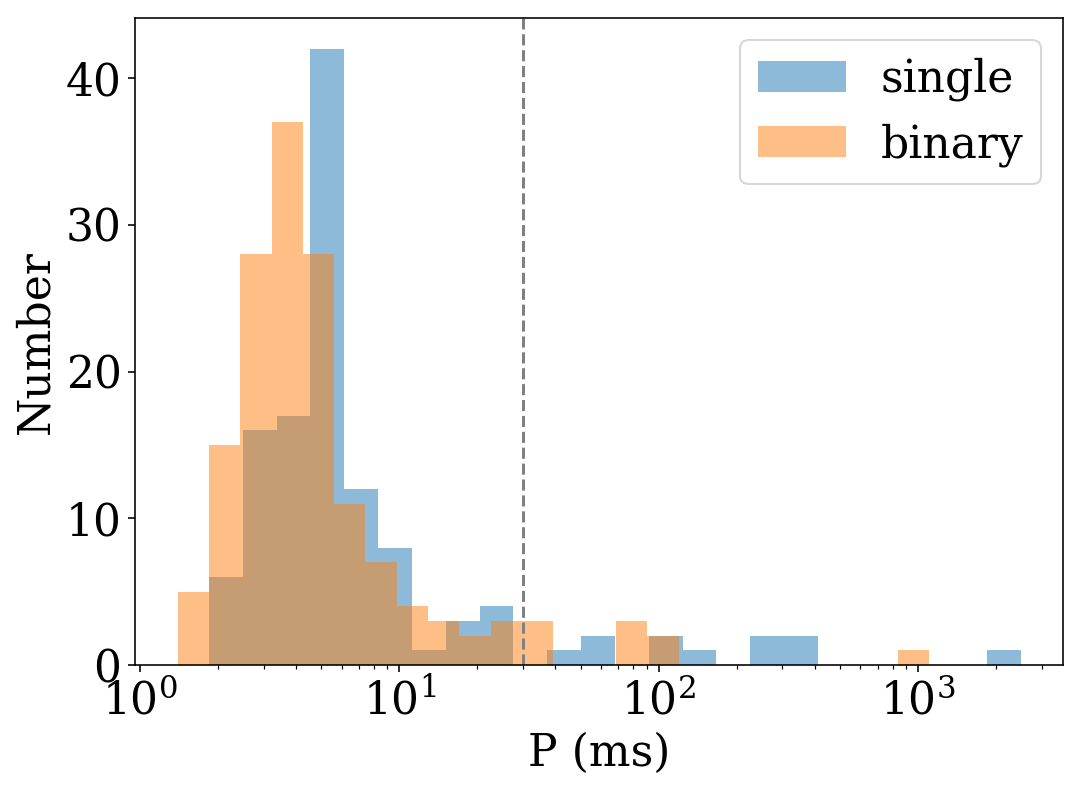

In [3]:
P, Pdot, Binflag, Namespin, Period, Ecc, Mc, Names, Pall, Bfall, Nameall = pc.readdata_freire()
print(len(Pall), len(Bfall))
print(max(Pall))

Psin=[]; Pbin=[]
for i in range(len(Bfall)):
    if Bfall[i]==0:
        Psin.append(Pall[i])
    else:
        Pbin.append(Pall[i])

print(min(Psin), max(Psin))
Psin = np.array(Psin); Pbin = np.array(Pbin)
##K-S test to check if the two distributions are statistically different.
from scipy import stats
print(stats.ks_2samp(Psin, Pbin))


plt.rcParams['figure.figsize'] = [8,6]
matplotlib.rcParams.update({'font.size': 22})
plt.hist(Psin, bins=np.logspace(np.log10(min(Psin)),np.log10(max(Psin)), 25), align='mid',
         alpha=0.5, label='single')
plt.hist(Pbin, bins=np.logspace(np.log10(min(Pbin)),np.log10(max(Pbin)+100), 25), align='mid',
         alpha=0.5, label='binary')
plt.axvline(x=30, ls='--', color='gray')

plt.xscale('log')
plt.xlabel('P (ms)')
plt.ylabel('Number')
plt.legend(loc='best')
plt.tight_layout()
plt.savefig('/projects/b1095/syr904/projects/PULSAR/spin_distri.pdf', dpi=300)

223
16 23
96 96 31


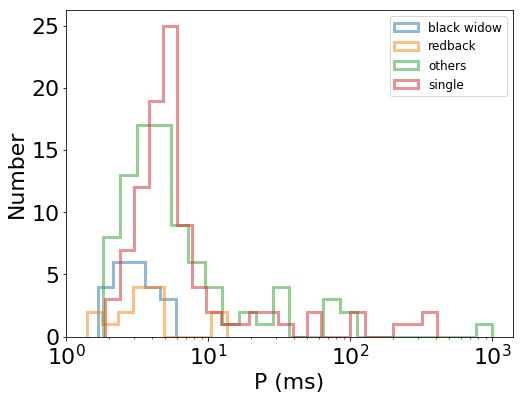

In [56]:
##Histogram of the spin distribution distinguishing redbacks and black widows
P, Pdot, Binflag, Namespin, Period, Ecc, Mc, Names, Pall, Bfall, Nameall = pc.readdata_freire()
datarb=np.genfromtxt('/projects/b1095/syr904/projects/PULSAR/data_observed/GCredback.dat', dtype=str)
databw=np.genfromtxt('/projects/b1095/syr904/projects/PULSAR/data_observed/GCblackwidow.dat', dtype=str)
namerb=datarb[:,0]; namebw=databw[:,0]

nsin=0; nbin=0; nundet=0
Pbw=[]; Prb=[]; Pother=[]; Psin=[]
for j in range(len(Pall)):
    if Bfall[j]==0:
        Psin.append(float(Pall[j]))
        nsin+=1
    elif Bfall[j]==1:
        nbin+=1
        if Nameall[j] in namerb:
            #print(Nameall[j])
            Prb.append(float(Pall[j]))
        elif Nameall[j] in namebw:
            Pbw.append(float(Pall[j]))
        else:
            Pother.append(float(Pall[j]))
    else:
        nundet+=1
        if Nameall[j] in namerb:
            #print(Nameall[j])
            Prb.append(float(Pall[j]))
        elif Nameall[j] in namebw:
            Pbw.append(float(Pall[j]))
        else:
            Pother.append(float(Pall[j]))
        
        
print(len(Prb), len(Pbw))
print(nsin, nbin, nundet)

plt.figure()
plt.hist(Pbw, bins=np.logspace(np.log10(min(Pbw)),np.log10(max(Pbw)), 6), alpha=0.5, 
         histtype='step', label='black widow', lw=3)
plt.hist(Prb, bins=np.logspace(np.log10(min(Prb)),np.log10(max(Prb)), 10), alpha=0.5, 
         histtype='step', label='redback', lw=3)
plt.hist(Pother, bins=np.logspace(np.log10(min(Pother)),np.log10(max(Pother)), 24), alpha=0.5, 
         histtype='step', label='others', lw=3)
plt.hist(Psin, bins=np.logspace(np.log10(min(Psin)),np.log10(max(Psin)), 24), alpha=0.5,
         histtype='step', label='single', lw=3)

plt.xscale('log')
plt.xlabel('P (ms)')
plt.ylabel('Number')
plt.legend(loc='best', fontsize=12)

['0.198096' '0.250519' '0.287888' '1.09716' '5.37372' '0.449739'
 '0.161701' '0.208145' '0.615436' '0.360893' '0.238145' '0.635227'
 '0.172502' '0.193098' '0.869575' '0.688134' '0.214507' '8.13284'
 '0.38734' '0.784' '0.15' '0.227982' '0.36672' '0.241536'] ['0.22' '0.38' '0.27' '0.49' '0.28' '0.13' '0.1' '0.17' '0.36' '0.19'
 '0.1' '0.44' '0.33' '0.35' '0.5' '0.85' 'cdots' '0.77' 'cdots' '0.15'
 '0.06' '0.47' '0.65' 'cdots']
['0.13879914332' '0.204' '0.2860160068' '0.06655134006' '0.2674610347'
 '0.0651157335' '0.27766607732' '0.1786354505' '0.1207729895'
 '0.0908739634' '0.3951890' '0.3111341185' '0.730241444' '0.165562'
 '0.3375' '0.15' '0.1366347269' '0.3819666069' '0.0978252578'
 '0.09911025490' '0.11' '0.12959037294' '0.135322188' '0.4166329460'
 '0.4196600370' '0.1456722395' '0.21288263050'] ['0.018946' '0.027884' '0.024748' '0.007934' '0.022040' '0.009486'
 '0.021957' '0.018756' '0.019617' '0.046840' '0.015629' '0.038512'
 '0.015826' '0.030371' '0.026562' '0.049789' '0.010370' '

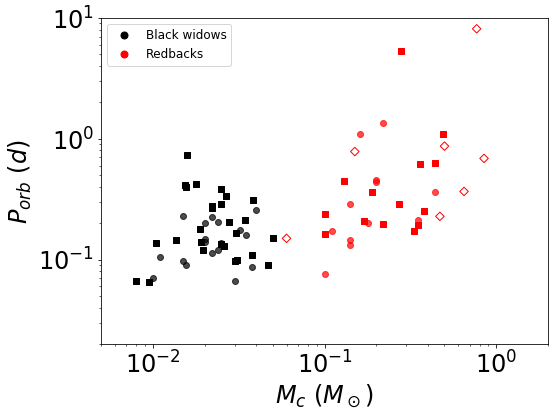

In [20]:
##Compare field and GC redbacks and blackwidows

##Field redbacks and blackwidows
datarb_field = np.genfromtxt('/projects/b1095/syr904/projects/PULSAR/field_redbacks.dat', dtype=str)
databw_field = np.genfromtxt('/projects/b1095/syr904/projects/PULSAR/field_blackwidows.dat', dtype=str)
name_rb_field = datarb_field[:,0]; Pb_rb = datarb_field[:,3]; Mc_rb = datarb_field[:,8]; cand_flag = datarb_field[:,12]
name_bw_field = databw_field[:,0]; Pb_bw = databw_field[:,5]; Mc_bw = databw_field[:,10]
print(Pb_rb, Mc_rb)
print(Pb_bw, Mc_bw)

##GC redbacks and blackwidows
P, Pdot, Binflag, Namespin, Period, Ecc, Mc, Names, Pall, Bfall, Nameall = pc.readdata_freire()
print(len(Pall), len(Bfall))
print(Ecc)
datarb=np.genfromtxt('/projects/b1095/syr904/projects/PULSAR/GCredback.dat', dtype=str)
databw=np.genfromtxt('/projects/b1095/syr904/projects/PULSAR/GCblackwidow.dat', dtype=str)
namerb=datarb[:,0]; namebw=databw[:,0]

plt.rcParams['figure.figsize'] = [8,6]
rdot=mlines.Line2D([], [],  linestyle = 'None', color='r', marker='o',
                  markersize=7, label='Redbacks')
kdot=mlines.Line2D([], [],  linestyle = 'None', color='k', marker='o',
                  markersize=7, label='Black widows')
bdot=mlines.Line2D([], [],  linestyle = 'None', color='b', marker='o',
                  markersize=7, markerfacecolor='none', label='Others')
gtri=mlines.Line2D([], [],  linestyle = 'None', color='g', marker='^',
                  markersize=7, markerfacecolor='none', label='Others')

fig, axs = plt.subplots()
for i in range(len(Mc)):
    if Mc[i][0] != '>':
        if Names[i] in namerb:
            axs.scatter(float(Mc[i]), float(Period[i]), color='red', alpha=0.7, zorder=2)
                  
        elif Names[i] in namebw:
            axs.scatter(float(Mc[i]), float(Period[i]), color='k', alpha=0.7, zorder=2)
                     
        #else:
            #axs.scatter(float(Mc[i]), float(Period[i]), color='b', facecolors='none', zorder=1)
                           
    #else:
    #    axs.errorbar(float(Mc[i].split('>')[1]), float(Period[i].split('>')[1]), xerr=0.002, yerr=0.2, lolims=True, 
    #                    xlolims=True, marker='o', markerfacecolor='none', color='b', linestyle='none')


for j in range(len(Mc_rb)):
    if Mc_rb[j] == 'cdots' or Mc_rb[j] == '-100' or Pb_rb[j] == 'cdots' or Pb_rb[j] == '-100':
        continue
    else:
        if cand_flag[j] == 'no':
            axs.scatter(float(Mc_rb[j]), float(Pb_rb[j]), color='red', marker = 's')
        else:
            axs.scatter(float(Mc_rb[j]), float(Pb_rb[j]), color='red', marker = 'D', facecolors='none')
           
        
Pb_bw = np.asarray(Pb_bw, dtype=np.float64); Mc_bw = np.asarray(Mc_bw, dtype=np.float64)
axs.scatter(Mc_bw, Pb_bw, color='k', marker = 's')
        
axs.set_yscale('log')
axs.set_xscale('log')
axs.set_ylim(0.02, 10)
axs.set_xlim(0.005, 2)
axs.set_xlabel(r'$M_c\ (M_\odot)$')
axs.set_ylabel(r'$P_{orb}\ (d)$')
axs.legend(handles=[kdot, rdot], loc='upper left', prop={'size': 12}, numpoints=1, frameon=True)

#plt.savefig('/projects/b1095/syr904/projects/PULSAR/period_mass.pdf')

0                  *
1                  *
2                  *
3                  *
4                  *
5                  *
6                  *
7                  *
8         He[fck+03]
9         UL[fck+03]
10        UL[fck+03]
11                 *
12                 *
13                 *
14        UL[fck+03]
15        UL[clf+00]
16        He[rvh+15]
17        UL[clf+00]
18        He[rvh+15]
19        He[cpf+15]
20        He[egh+01]
21                 *
22        MS[egc+02]
23                 *
24        He[cpf+15]
25                 *
26                 *
27                 *
28                 *
29        He[hrs+07]
           ...      
116                *
117                *
118        UL[fre08]
119                *
120       He[pfb+13]
121        UL[fre08]
122                *
123        UL[fre08]
124                *
125       UL[lrfs11]
126                *
127    He(?)[hrs+07]
128       He[cfpd06]
129                *
130                *
131                *
132          

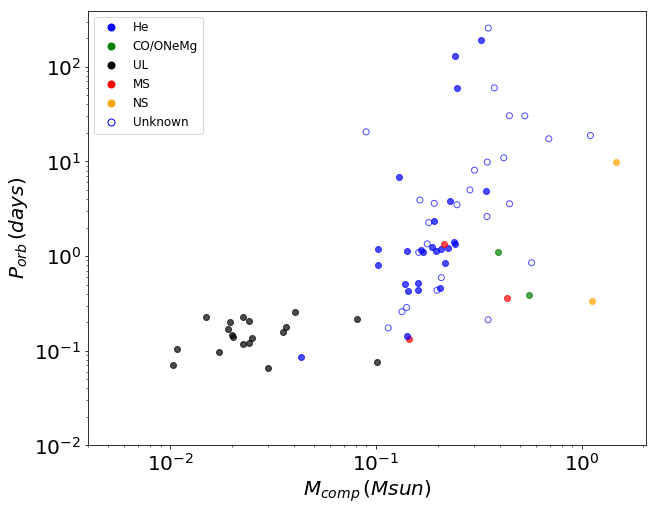

In [7]:
##ATNF catalog GC pulsars
df_all_atnf = pd.read_excel('/projects/b1095/syr904/projects/PULSAR/data_observed/gc_all_atnf.xlsx', skiprows = 1, 
                         names = ['Nos', 'Name', 'JName', 'P0', 'P1', 'PB', 'Ecc', 'MinMass', 'MedMass', 'BinComp', 'Assoc', 'Age', 'Bsurf'])


##ATNF catalog GC pulsars
gdot=mlines.Line2D([], [],  linestyle = 'None', color='g', marker='o',
                  markersize=7, label='CO/ONeMg')
bdot=mlines.Line2D([], [],  linestyle = 'None', color='b', marker='o',
                  markersize=7, label='He')
kdot=mlines.Line2D([], [],  linestyle = 'None', color='k', marker='o',
                  markersize=7, label='UL')
rdot=mlines.Line2D([], [],  linestyle = 'None', color='r', marker='o',
                  markersize=7, label='MS')
odot=mlines.Line2D([], [],  linestyle = 'None', color='orange', marker='o',
                  markersize=7, label='NS')
bdotemp=mlines.Line2D([], [],  linestyle = 'None', color='b', marker='o',
                  markersize=7, markerfacecolor = 'none', label='Unknown')



matplotlib.rcParams.update({'font.size': 20})

medmass = df_all_atnf['MedMass']; porb = df_all_atnf['PB']
bincomp = df_all_atnf['BinComp']
print(bincomp)

fig, ax = plt.subplots(figsize=(10, 8))
for ii in range(len(medmass)):
    if medmass[ii]!='*' and porb[ii]!='*':
        if bincomp[ii][:2]== 'He':
            ax.scatter(medmass[ii], porb[ii], color = 'b', alpha=0.7)
        elif bincomp[ii][:2]== 'CO':
            ax.scatter(medmass[ii], porb[ii], color = 'g', alpha=0.7)
        elif bincomp[ii][:2]== 'UL':
            ax.scatter(medmass[ii], porb[ii], color = 'k', alpha=0.7)
        elif bincomp[ii][:2]== 'MS':
            ax.scatter(medmass[ii], porb[ii], color = 'r', alpha=0.7)
        elif bincomp[ii][:2]== 'NS':
            ax.scatter(medmass[ii], porb[ii], color = 'orange', alpha=0.7)
        elif bincomp[ii] == '*':
            ax.scatter(medmass[ii], porb[ii], color = 'b', facecolor = 'none', alpha=0.7)


ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(ymin = 0.01)
ax.set_xlim(xmin = 0.004)
ax.set_xlabel(r'$M_{comp}\,(Msun)$')
ax.set_ylabel(r'$P_{orb}\,(days)$')

ax.legend(handles=[bdot, gdot, kdot, rdot, odot, bdotemp], loc='upper left', prop={'size': 12}, numpoints=1, frameon=True)

254
254 254
['0.00031', '0.07056', '<0.0004', '<0.00004', '<0.00016', '0.0', '0.00008', '0.0', '0.00039', '0.00040', '0.00014', '0.0', '0.0', '0.0000005', '0.000003', '0', '0', '0.88798', '0.862', '0.708', '0', '0', '0.020', '0.0098', '0', '<0.01', '0.0', '0.0', '0.0753', '0.0', '0', '0.13784', '0.0', '0.0', '0.0', '0.0', '0.0', '0.02532', '0.000002', '0.0005730', '0.00012', '0.0', '0.000004', '<0.00007', '<0.00006', '0.00045', '0.0', '0.0', '0.000907', '0', '<0.005', '0', '0', '0', '<0.0001', '0.0', '0.02', '0.428', '0.350', '0', '0.000045', '0', '0', '0.722', '0.60498', '0', '0.015', '0.3024', '0.00002', '0.7608', '0', '0', '0.4400', '0.20475', '0.0065856', '0.57016', '0.00', '0.0531', '0', '0.71243', '0.00404', '0.038', '0.21206', '0.0', '0.74703', '0', '0.380466', '0.84704372', '0.776334', '0.0', '0.0', '0.0', '0.0', '0.001524', '0.0', '0.0', '0.0', '0.000021', '0.0', '0', '0.0', '<0.00001', '<0.00013', '0.0', '0.68139', '0.0751', '0', '0', '0', '<0.00012', '>0.52']
J0024-7204I
J00

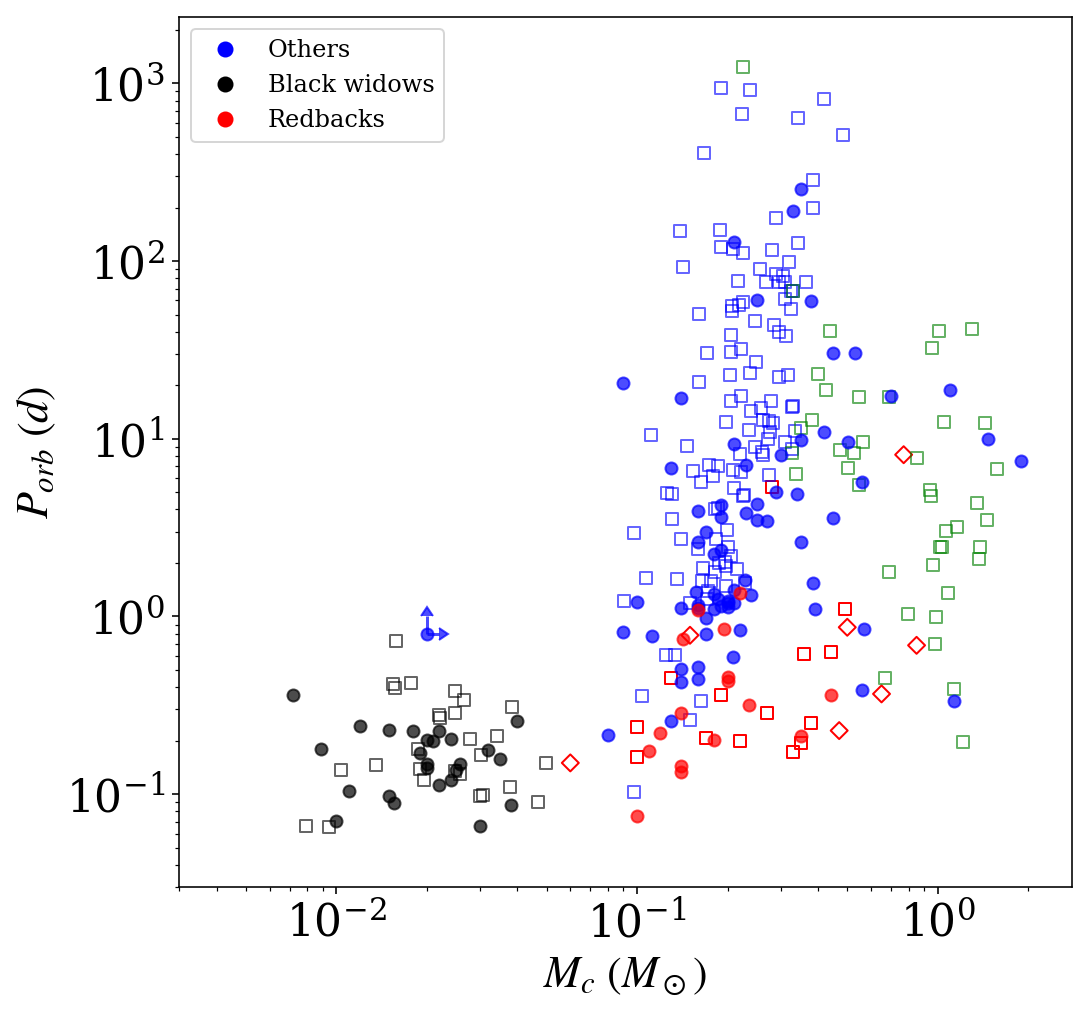

In [4]:
##Compare the total populations of field and GC pulsars in P-M plot
#GC pulsars
P, Pdot, Binflag, Namespin, Period, Ecc, Mc, Names, Pall, Bfall, Nameall = pc.readdata_freire()
print(len(Pall), len(Bfall))
print(Ecc)
datarb=np.genfromtxt('/projects/b1095/syr904/projects/PULSAR/data_observed/GCredback.dat', dtype=str)
databw=np.genfromtxt('/projects/b1095/syr904/projects/PULSAR/data_observed/GCblackwidow.dat', dtype=str)
namerb=datarb[:,0]; namebw=databw[:,0]

#Field pulsars
datarb_field = np.genfromtxt('/projects/b1095/syr904/projects/PULSAR/data_observed/field_redbacks.dat', dtype=str)
databw_field = np.genfromtxt('/projects/b1095/syr904/projects/PULSAR/data_observed/field_blackwidows.dat', dtype=str)
name_rb_field = datarb_field[:,0]; Pb_rb = datarb_field[:,3]; Mc_rb = datarb_field[:,8]; cand_flag = datarb_field[:,12]
name_bw_field = databw_field[:,0]; Pb_bw = databw_field[:,5]; Mc_bw = databw_field[:,10]

datahe_field = pd.read_excel('/projects/b1095/syr904/projects/PULSAR/data_observed/field_hewds.xlsx', 
                             skiprows=[1], 
                             names = ['Num', 'Name', 'P0', 'P1', 'PB', 'ECC', 'MinMass', 'MedMass', 'Bincomp', 'Age', 'Bsurf'])
dataco_field = pd.read_excel('/projects/b1095/syr904/projects/PULSAR/data_observed/field_cowds.xlsx', 
                             skiprows=[1],
                             names=['Num', 'Name', 'P0', 'P1', 'PB', 'ECC', 'MinMass', 'MedMass', 'Bincomp', 'Age', 'Bsurf'])
Pb_he = datahe_field['PB']; Medmass_he = datahe_field['MedMass']
Pb_co = dataco_field['PB']; Medmass_co = dataco_field['MedMass']
Pb_he.pop(2); Medmass_he.pop(2)


#Plot
plt.rcParams['figure.figsize'] = [8,8]
rdot=mlines.Line2D([], [],  linestyle = 'None', color='r', marker='o',
                  markersize=7, label='Redbacks')
kdot=mlines.Line2D([], [],  linestyle = 'None', color='k', marker='o',
                  markersize=7, label='Black widows')
bdot=mlines.Line2D([], [],  linestyle = 'None', color='b', marker='o',
                  markersize=7, label='Others')
gtri=mlines.Line2D([], [],  linestyle = 'None', color='g', marker='^',
                  markersize=7, markerfacecolor='none', label='Others')

fig, axs = plt.subplots(sharey=False)
fig.subplots_adjust(wspace=0.05)
for j in range(len(Mc_rb)):
    if Mc_rb[j] == 'cdots' or Mc_rb[j] == '-100' or Pb_rb[j] == 'cdots' or Pb_rb[j] == '-100':
        continue
    else:
        if cand_flag[j] == 'no':
            axs.scatter(float(Mc_rb[j]), float(Pb_rb[j]), color='red', marker = 's', facecolor='none')
        else:
            axs.scatter(float(Mc_rb[j]), float(Pb_rb[j]), color='red', marker = 'D', facecolors='none')
           
        
Pb_bw = np.asarray(Pb_bw, dtype=np.float64); Mc_bw = np.asarray(Mc_bw, dtype=np.float64)
axs.scatter(Mc_bw, Pb_bw, color='k', marker = 's', facecolor='none', alpha=0.6)
axs.scatter(Medmass_he, Pb_he, color='b', marker = 's', facecolor='none', alpha=0.6)
axs.scatter(Medmass_co, Pb_co, color='g', marker = 's', facecolor='none', alpha=0.6)

for i in range(len(Mc)):
    if Mc[i][0] != '>':
        #if float(Mc[i])<=0.05:
        #    print(Names[i])
        if float(Period[i])<0.4:
            print(Names[i])
        if Names[i] in namerb:
            axs.scatter(float(Mc[i]), float(Period[i]), color='red', alpha=0.7, zorder=2)
                
            
        elif Names[i] in namebw:
            axs.scatter(float(Mc[i]), float(Period[i]), color='k', alpha=0.7, zorder=2)
            
        else:
            axs.scatter(float(Mc[i]), float(Period[i]), color='b', alpha=0.7, zorder=1)          
    
    else:
        print(Mc[i])
        axs.errorbar(float(Mc[i].split('>')[1]), float(Period[i].split('>')[1]), xerr=0.002, yerr=0.2, lolims=True, 
                        xlolims=True, marker='o', color='b', alpha=0.7, linestyle='none')
        
            
        
axs.set_yscale('log')
axs.set_xscale('log')
axs.set_ylim(ymin=0.03)
axs.set_xlim(xmin=0.003)
axs.set_xlabel(r'$M_c\ (M_\odot)$')
axs.set_ylabel(r'$P_{orb}\ (d)$')
axs.legend(handles=[bdot, kdot, rdot], loc='upper left', prop={'size': 12}, numpoints=1, frameon=True)

#plt.savefig('/projects/b1095/syr904/projects/PULSAR/period_mass_cluster_field_comparison.pdf')

330
330 330
['0.00031', '0.07056', '<0.0004', '<0.00004', '<0.00016', '0.0', '0.00008', '0.0', '0.00039', '0.00040', '0.00014', '0.0', '0.0', '0.0000005', '0.000003', '0', '0', '0.88798', '0.862', '0.70793', '0', '0', '0.020', '0.0098', '0', '0.01', '0.0132417', '0.000013', '0.000009', '0.0', '0', '0', '0', '0', '0', '0', '0', '0', '0.0000040', '0.0747556', '0.000309', '0.0', '0.137839', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.02532', '0.000002', '0.0005730', '0.00012', '0.0', '0.0000064', '<0.00007', '0.000034', '0.000456', '0.0', '0.00007', '0.000088', '0', '0.000208', '0', '<0.005', '0', '0', '0', '<0.0001', '0', '0.0', '0.02', '0.428', '0.350', '0', '0.000045', '0', '0', '0.722', '0.60498', '0', '0.015', '0.3024', '0.00002', '0.7608', '0', '0', '0.4400', '0.20475', '0.0065856', '0.3248889', '0.905186', '0.0', '0.0', '0.0', '0.02569', '0.00026', '0.00009', '0.00915', '0.57016', '0.00', '0.0531', '0', '0.71243', '0.00404', '0.03822', '0.21206', '0.0', '0.74703', '0', '0.380466',

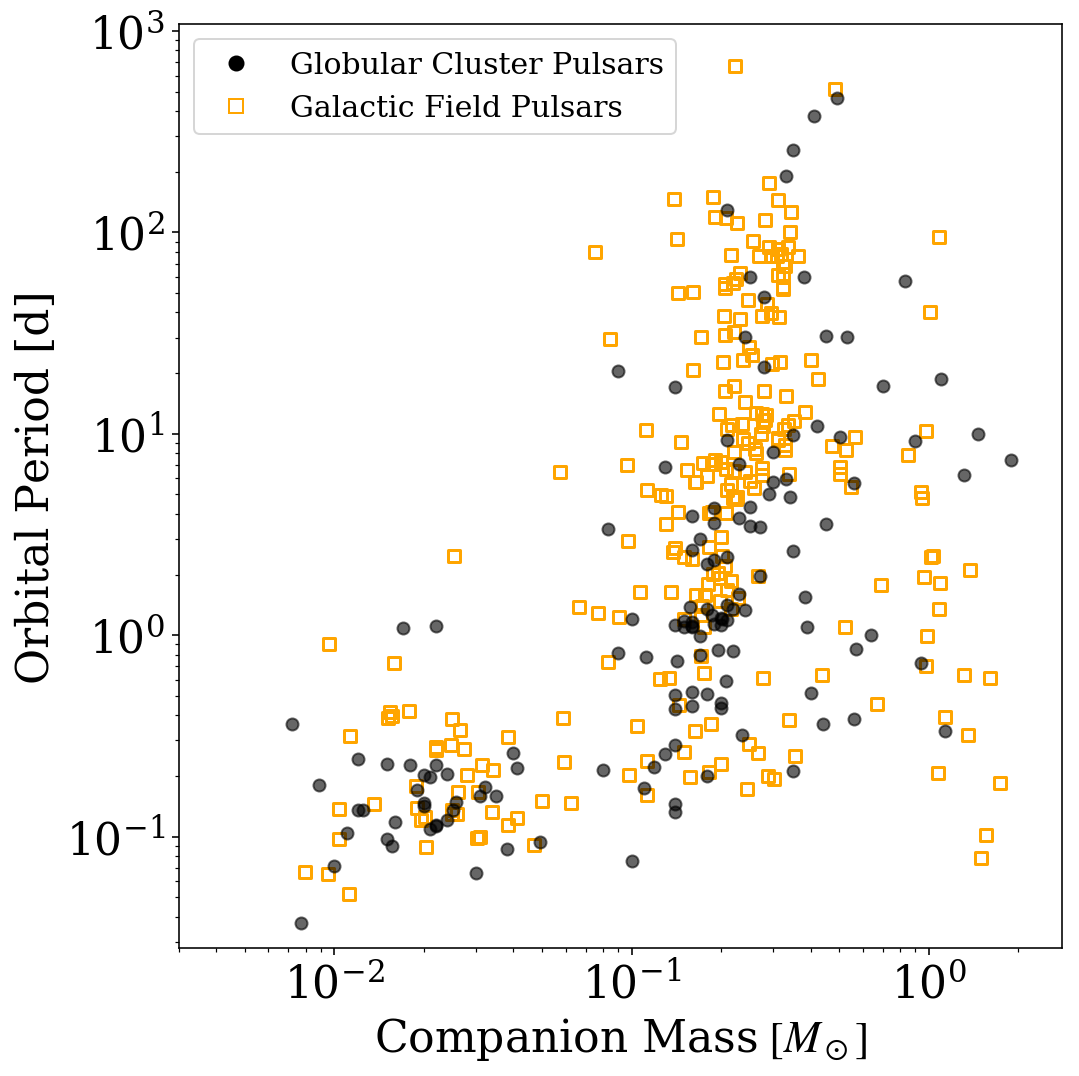

In [12]:
##Compare the total populations of field and GC pulsars in P-M plot
##Simplified
#GC pulsars
from importlib import reload
reload(pc)
P, Pdot, Binflag, Namespin, Period, Ecc, Mc, Names, Pall, Bfall, Nameall, Clusall = pc.readdata_freire('/projects/b1095/syr904/projects/PULSAR/data_observed')
print(len(Pall), len(Bfall))
print(Ecc)
datarb=np.genfromtxt('/projects/b1095/syr904/projects/PULSAR/data_observed/GCredback.dat', dtype=str)
databw=np.genfromtxt('/projects/b1095/syr904/projects/PULSAR/data_observed/GCblackwidow.dat', dtype=str)
namerb=datarb[:,0]; namebw=databw[:,0]


##Field MSPs
data_field = pd.read_excel('/projects/b1095/syr904/projects/PULSAR/data_observed/all_field_msps_2.40.xlsx', 
                             skiprows=[1], 
                             names = ['Num','Name','P0','P1','PB','ECC','MinMass','MedMass','Bincomp','Assoc','Age','Bsurf'])

Pb_field = np.array(data_field['PB']); Medmass_field = np.array(data_field['MedMass'])
Pb_bin = Pb_field[(Pb_field!='*') & (Medmass_field!='*')]
Medmass_bin = Medmass_field[(Pb_field!='*') & (Medmass_field!='*')]
#Pb_he.pop(2); Medmass_he.pop(2)


#Plot
plt.rcParams['figure.figsize'] = [8,8]
kdot=mlines.Line2D([], [],  linestyle = 'None', color='k', marker='o',
                  markersize=7, label='Globular Cluster Pulsars')
odot=mlines.Line2D([], [],  linestyle = 'None', color='orange', marker='s',
                  markersize=7, markerfacecolor='None', label='Galactic Field Pulsars')


fig, axs = plt.subplots(sharey=False)
fig.subplots_adjust(wspace=0.05)
axs.scatter(Medmass_bin, Pb_bin, color='orange', marker = 's', lw=1.5, facecolor='none')

for i in range(len(Mc)):
    if Mc[i][0] != '>':
        #if float(Mc[i])<=0.05:
        #    print(Names[i])
        if float(Period[i])<0.4:
            print(Names[i])
        if Names[i] in namerb:
            axs.scatter(float(Mc[i]), float(Period[i]), color='k', alpha=0.6, zorder=2)
                
            
        elif Names[i] in namebw:
            axs.scatter(float(Mc[i]), float(Period[i]), color='k', alpha=0.6, zorder=2)
            
        else:
            axs.scatter(float(Mc[i]), float(Period[i]), color='k', alpha=0.6, zorder=1)          
    
    else:
        print(Mc[i])
        axs.errorbar(float(Mc[i].split('>')[1]), float(Period[i].split('>')[1]), xerr=0.002, yerr=0.2, lolims=True, 
                        xlolims=True, marker='o', color='k', alpha=0.6, linestyle='none')
        
            
        
axs.set_yscale('log')
axs.set_xscale('log')
#axs.set_ylim(ymin=0.03)
axs.set_xlim(xmin=0.003)
axs.set_xlabel('Companion Mass'+r'$\ [M_\odot]$')
axs.set_ylabel('Orbital Period [d]')
axs.legend(handles=[kdot, odot], loc='upper left', prop={'size': 15}, numpoints=1, frameon=True)

fig.tight_layout()

plt.savefig('/projects/b1095/syr904/projects/PULSAR/modified_period_mass_cluster_field_comparison.pdf')

[4.87, 2.36, 2.6, 5.19, 3.3, 4.39, 8.85, 5.49, 4.08, 4.64, 5.16, 2.87, 28.85, 3.39, 4.84, 3.24, 5.79, 2.43, 6.28, 6.0, 3.42, 2.44, 3.22, 3.5, 4.79, 8.12, 4.07, 4.69, 1.65, 3.62, 1.49, 4.69, 2.24, 2.72, 5.83, 1.85, 5.47, 2.79, 6.09, 3.78, 4.63, 3.96, 3.79, 5.39, 1.56, 4.81, 5.89, 2.43, 3.61, 5.19, 4.87, 24.5, 5.22, 3.65, 4.93, 4.81]
223
223 223
1004.04
1.8901 405.934


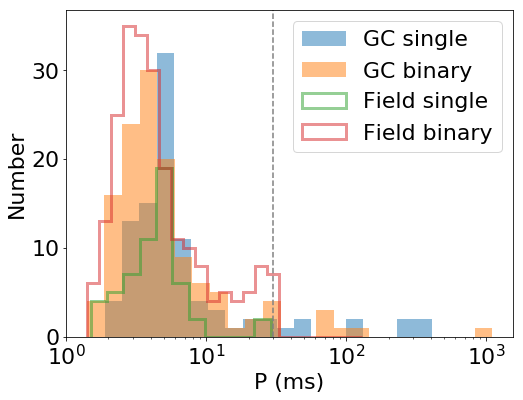

In [49]:
###Compare field and GC spin period distribution

##Field MSPs
field_msp = pd.read_excel('/projects/b1095/syr904/projects/PULSAR/data_observed/all_field_msps.xlsx',
                         names = ['Name', 'P', 'DM', 'l', 'b', 'Pb', 'x', 'year', 'notes'])
P_all_field = field_msp['P']; Pb_all_field = field_msp['Pb']
isnan=Pb_all_field.isnull()
#print(isnan)
P_all_field = list(P_all_field); Pb_all_field = list(Pb_all_field)
isnan=list(isnan)

Psin_field=[]; Pbin_field=[]
for k in range(len(isnan)):
    if Pb_all_field[k]=='*':
        continue
    elif isnan[k]:
        Psin_field.append(P_all_field[k])
    else:
        Pbin_field.append(P_all_field[k])
        
print(Psin_field)
        
##GC pulsars
P, Pdot, Binflag, Namespin, Period, Ecc, Mc, Names, Pall, Bfall, Nameall = pc.readdata_freire()
print(len(Pall), len(Bfall))
print(max(Pall))

Psin=[]; Pbin=[]
for i in range(len(Bfall)):
    if Bfall[i]==0:
        Psin.append(Pall[i])
    else:
        Pbin.append(Pall[i])

print(min(Psin), max(Psin))

plt.rcParams['figure.figsize'] = [8,6]
matplotlib.rcParams.update({'font.size': 22})
plt.hist(Psin, bins=np.logspace(np.log10(min(Psin)),np.log10(max(Psin)), 20), align='mid',
         alpha=0.5, label='GC single')
plt.hist(Pbin, bins=np.logspace(np.log10(min(Pbin)),np.log10(max(Pbin)+100), 24), align='mid',
         alpha=0.5, label='GC binary')
plt.hist(Psin_field, bins=np.logspace(np.log10(min(Psin_field)),np.log10(max(Psin_field)), 12),
         align='mid',
         alpha=0.5, label='Field single', histtype='step', lw=3)
plt.hist(Pbin_field, bins=np.logspace(np.log10(min(Pbin_field)),np.log10(max(Pbin_field)+100), 24), 
         align='mid',
         alpha=0.5, label='Field binary', histtype='step', lw=3)
plt.axvline(x=30, ls='--', color='gray')

plt.xscale('log')
plt.xlabel('P (ms)')
plt.ylabel('Number')
plt.legend(loc='best')
#plt.savefig('/projects/b1095/syr904/projects/PULSAR/spin_distri.pdf', dpi=300)

In [4]:
##Young pulsars in clusters
P, Pdot, Binflag, Namespin, Period, Ecc, Mc, Names, Pall, Bfall, Nameall = pc.readdata_freire()
#print(P)

for ii in range(len(Pall)):
    if Pall[ii]>=30:
        print(Nameall[ii], Pall[ii])

223
B1310+18 33.1632
B1718-19 1004.04
J1735-3028A 113.695
J1748-2446J 80.3379
B1745-20 288.603
J1750-37A 111.608
J1750-3703E 251.15877
J1801-0857G 51.59
B1820-30B 378.596
J1823-3021C 405.934
J1824-2452D 79.83543
J1953+1846B 79.9
J1953+1846D 100.67
B2127+11A 110.665
B2127+11B 56.133
B2127+11C 30.5293
B2127+11G 37.6602


241 54


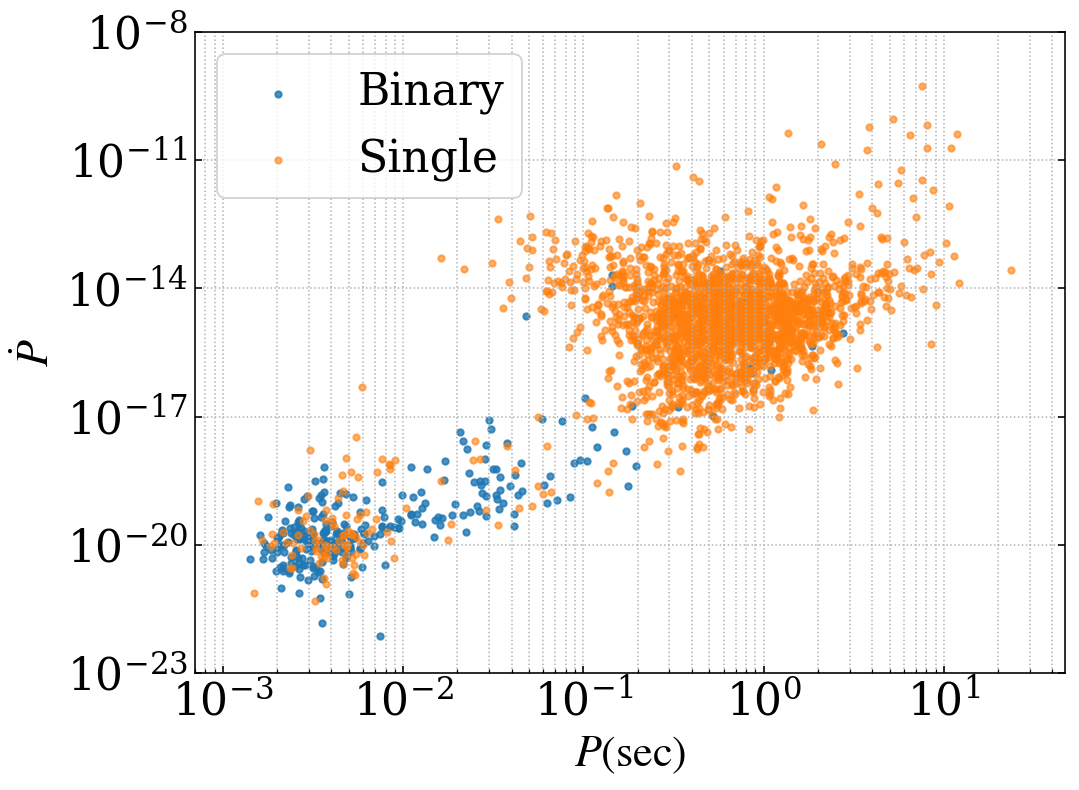

In [47]:
#All atnf pulsars ppdot plot
df_atnf = pd.read_excel('/projects/b1095/syr904/projects/PULSAR/data_observed/atnf_1.67.xlsx', skiprows = 2, 
                         names = ['No','P0','P1','BINARY','PB','ECC','Median','BINCOMP','PSR'])
P = np.array(df_atnf['P0']); Pdot = np.array(df_atnf['P1'])
Pb = np.array(df_atnf['PB'])
P = P[Pdot!='*']; Pb = Pb[Pdot!='*']
Pdot = np.absolute(Pdot[Pdot!='*'])

print(len(P[(Pb!='*') & (P<=0.03)]), len(P[(Pb!='*') & (P>0.03)]))

fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(P[Pb!='*'], Pdot[Pb!='*'], 
           s=10, alpha=0.8, label='Binary')
ax.scatter(P[Pb=='*'], Pdot[Pb=='*'], 
           s=10, alpha=0.6, label='Single')

ax.set_xscale('log')
ax.set_xlim(xmin=np.min(P)/2.,xmax=np.max(P)*2.)
ax.set_yscale('log')
ax.set_ylim(ymin=10**-23, ymax=10**-8)
ax.set_xlabel(r'$P\rm{(sec)}$')
ax.set_ylabel(r'$\dot{P}$')
ax.legend(loc='best', fontsize=22)
ax.grid(linestyle=':',which='major',linewidth='0.75')
ax.grid(linestyle=':',which='minor',linewidth='0.75')
ax.tick_params(top=False, right=True, direction = 'in', which='both')
fig.tight_layout()
plt.savefig('/projects/b1095/syr904/projects/PULSAR/data_observed/atnf1.67_ppdot.pdf', dpi=300)